In [2]:
import pandas as pd


data = pd.read_csv("dataset.csv")

print(data.head())

print(data.info())

  stock_symbol        date      open      high       low     close  adj_close   
0         AAPL  2010-01-04  7.622500  7.660714  7.585000  7.643214   6.515213  \
1         AAPL  2010-01-05  7.664286  7.699643  7.616071  7.656429   6.526476   
2         AAPL  2010-01-06  7.656429  7.686786  7.526786  7.534643   6.422664   
3         AAPL  2010-01-07  7.562500  7.571429  7.466071  7.520714   6.410790   
4         AAPL  2010-01-08  7.510714  7.571429  7.466429  7.570714   6.453412   

      volume  
0  493729600  
1  601904800  
2  552160000  
3  477131200  
4  447610800  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45088 entries, 0 to 45087
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   stock_symbol  45088 non-null  object 
 1   date          45088 non-null  object 
 2   open          45088 non-null  float64
 3   high          45088 non-null  float64
 4   low           45088 non-null  float64
 5   close    

In [3]:
data['date'] = pd.to_datetime(data['date'])


missing_values = data.isnull().sum()
print(missing_values)

stock_symbol    0
date            0
open            0
high            0
low             0
close           0
adj_close       0
volume          0
dtype: int64


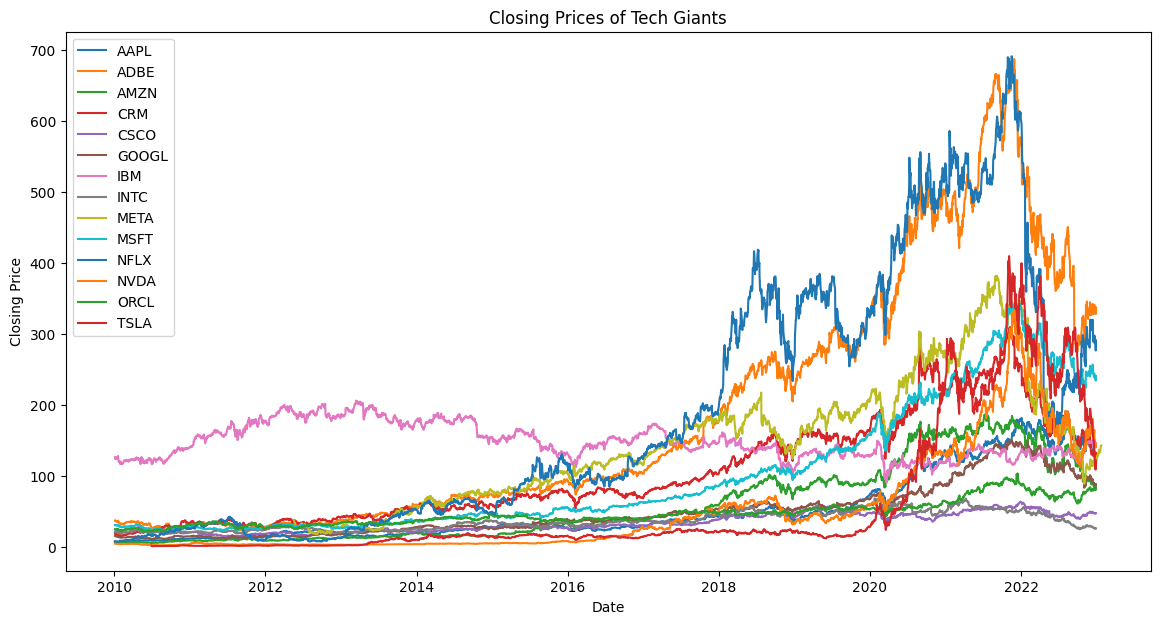

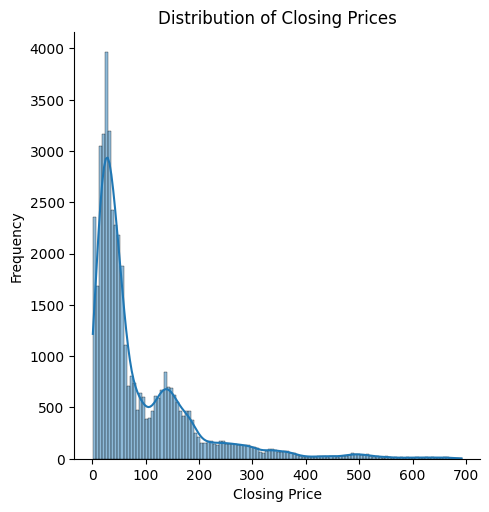

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


plt.figure(figsize=(14, 7))
for stock in data['stock_symbol'].unique():
    stock_data = data[data['stock_symbol'] == stock]
    plt.plot(stock_data['date'], stock_data['close'], label=stock)
plt.legend()
plt.title('Closing Prices of Tech Giants')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()


sns.displot(data['close'], kde=True)
plt.title('Distribution of Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

stock_symbol      AAPL      ADBE      AMZN       CRM      CSCO     GOOGL   
stock_symbol                                                               
AAPL          1.000000  0.927253  0.920328  0.893372  0.797853  0.964938  \
ADBE          0.927253  1.000000  0.987418  0.984823  0.897669  0.955676   
AMZN          0.920328  0.987418  1.000000  0.983133  0.901185  0.943111   
CRM           0.893372  0.984823  0.983133  1.000000  0.907600  0.934460   
CSCO          0.797853  0.897669  0.901185  0.907600  1.000000  0.880475   
GOOGL         0.964938  0.955676  0.943111  0.934460  0.880475  1.000000   
IBM          -0.499026 -0.600266 -0.616349 -0.601432 -0.625383 -0.533303   
INTC          0.640238  0.821974  0.836193  0.857747  0.872394  0.736793   
META          0.780023  0.935745  0.928992  0.942619  0.865189  0.870164   
MSFT          0.983985  0.968018  0.956084  0.937324  0.863189  0.980910   
NFLX          0.809337  0.953595  0.958672  0.968338  0.904068  0.868655   
NVDA        

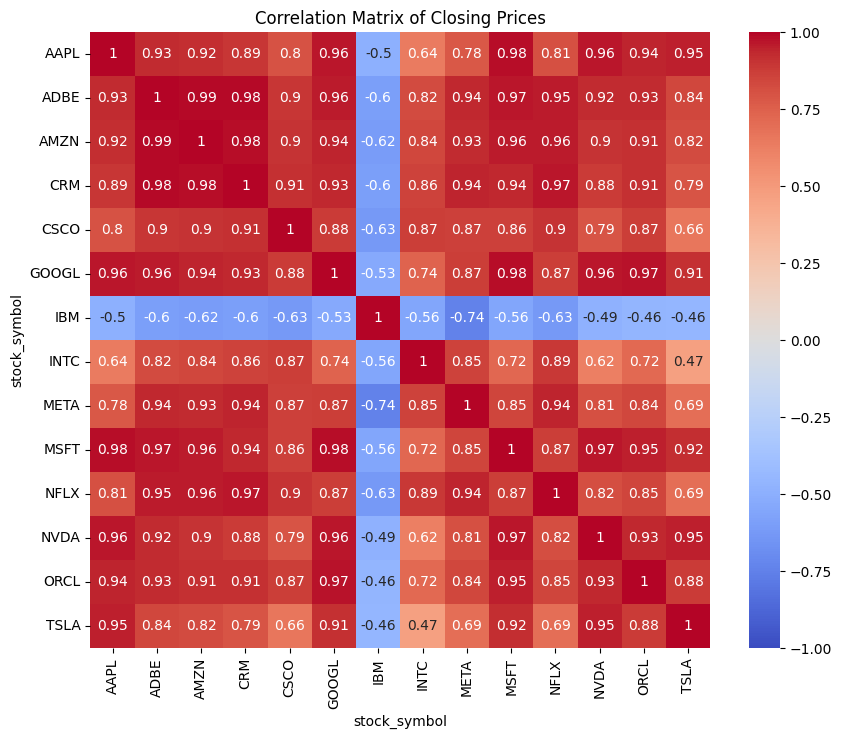

In [5]:

pivot_data = data.pivot(index='date', columns='stock_symbol', values='close')

correlation_matrix = pivot_data.corr()
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Closing Prices')
plt.show()

Mean Squared Error: 2.325745595873426


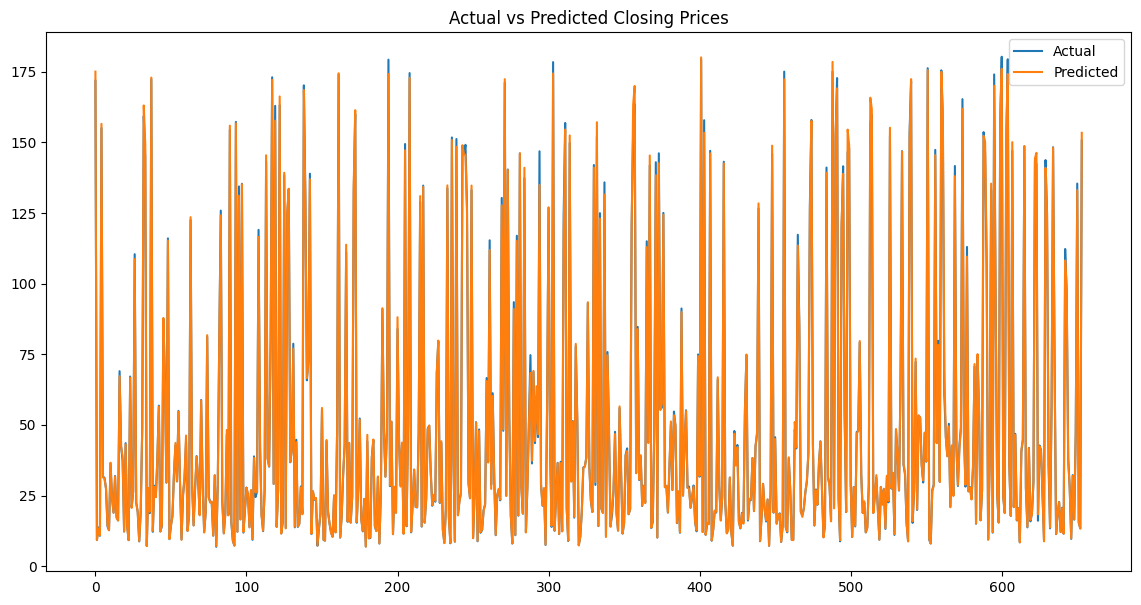

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

apple_data = data[data['stock_symbol'] == 'AAPL']

apple_data['prev_close_1'] = apple_data['close'].shift(1)
apple_data['prev_close_2'] = apple_data['close'].shift(2)
apple_data['prev_close_3'] = apple_data['close'].shift(3)
apple_data['prev_close_4'] = apple_data['close'].shift(4)
apple_data['prev_close_5'] = apple_data['close'].shift(5)

apple_data.dropna(inplace=True)

X = apple_data[['prev_close_1', 'prev_close_2', 'prev_close_3', 'prev_close_4', 'prev_close_5']]
y = apple_data['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted Closing Prices')
plt.show()